# Final Project

This is your final project. It accounts for maximum 20% of the final grade.

**Instructions**
* You should work on this project either **individually**
* This project will be partially **auto-graded** and partially **manually graded**: the auto-grading will check that your answers to the question is correct (or close to be correct) and the manual grading will check your python coding and visualization style. **If your submission fails the auto-grade, you will get 0.** 

**Note**
* Write your code after you see `# YOUR CODE HERE` 
* Read the instruction of each question. You have a **limited time to submit: Date Time**. Only your last submission counts.
* Copying the solution of other student is forbidden.
* For each example, the symbol `->` indicates the value the function should return.
* After the deadline, submission is only possible by email attachment (.ipynb file) to your TA and cc your instructor. Late submission will be penalized (up to 100%, if late > 72 hours).

**Project Description**

This data set `CardioGoodFitness.csv` is for customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables `Product`, `Age`, `Gender`, `Education`, `MaritalStatus`, `Usage`, `Fitness`, `Income`, and `Miles`. 

* `Product`: the model of the treadmill

* `Age`: in number of years, of the customer

* `Gender`: of the customer

* `Education`: in number of years, of the customer

* `MaritalStatus`: of the customer

* `Usage`: average number of times the customer wants to use the treadmill per week

* `Fitness`: self rated fitness score of the customer (5 - very fit, 1 - very unfit)

* `Income`: of the customer

* `Miles`: expected to run



To understand products, your project focuses on the following two parts:
1. Process and analyze the data 
2. Create visualizations



**Guidelines**
* You will read instructions and hints carefully and apply your best judgement to answer the questions.
* For each question, you need to write Python codes to answer and you need to assign the value to a variable.
* For Part 1, you need to store your answers in the `answers` dictionary with keys "1", "2", "3", ... "10" and corresponding values (the answer to each question).

In [2]:
# You will need to import these two packages.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
import seaborn as sns

In [3]:
np.random.seed(42)

# Function to generate random data
def generate_dataset(num_records=200):
    # Define possible values for each column
    products = ["ModelA", "ModelB", "ModelC"]  # Different treadmill models
    genders = ["Male", "Female"]
    marital_statuses = ["Single", "Partnered"]
    
    # Generate random data
    data = {
        "Product": [random.choice(products) for _ in range(num_records)],  # Randomly pick a product
        "Age": [random.randint(18, 65) for _ in range(num_records)],  # Random age between 18 and 65
        "Gender": [random.choice(genders) for _ in range(num_records)],  # Randomly pick a gender
        "Education": [random.randint(12, 20) for _ in range(num_records)],  # Years of education (12 to 20)
        "MaritalStatus": [random.choice(marital_statuses) for _ in range(num_records)],  # Single or Partnered
        "Usage": [random.randint(1, 7) for _ in range(num_records)],  # Random treadmill usage (1 to 7 times a week)
        "Fitness": [random.randint(1, 5) for _ in range(num_records)],  # Fitness score (1 to 5)
        "Income": [random.randint(30000, 120000) for _ in range(num_records)],  # Income in dollars
        "Miles": [random.randint(50, 300) for _ in range(num_records)],  # Miles expected to run
    }
    
    # Convert to a DataFrame
    df = pd.DataFrame(data)
    return df

# Generate the dataset
num_records = 200  # Specify the number of records you want in the dataset
df = generate_dataset(num_records)

# Save the dataset to a CSV file
df.to_csv("CardioGoodFitness.csv", index=False)

print(f"Dataset with {num_records} records has been successfully created and saved as 'CardioGoodFitness.csv'!")
data = pd.read_csv("CardioGoodFitness.csv")
data.head()

Dataset with 200 records has been successfully created and saved as 'CardioGoodFitness.csv'!


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,ModelC,18,Female,13,Partnered,6,1,46365,129
1,ModelB,41,Female,18,Partnered,2,2,87101,273
2,ModelA,32,Male,12,Single,6,2,67638,77
3,ModelC,61,Female,13,Partnered,2,3,30614,144
4,ModelA,19,Female,13,Single,3,4,91977,122


## Questions (50 points)

Run preliminary data analysis on the dataset to answer the following questions:

1.What is the average income of customers in the dataset?

2.Which gender has a higher median fitness level?

3.What is the standard deviation of treadmill usage per week among customers?

4.What is the average age of customers for each product type?

5.What is the range (maximum - minimum) of miles expected to run by customers?

6.How many customers use the treadmill 5 or more times per week?

7.What percentage of Male customers have an income greater than $75,000?

8.What percentage of customers are older than 50 years (in float, e.g., 0.15)?

9.What is the minimum number of miles expected to be run by a Female customer?

10.What is the most common income bracket (e.g., ‘$0-$30,000', '$30,001-$50,000', '$50,001-$70,000', '$70,001-$90,000', '$90,001-$110,000', '$110,000+') in the dataset?

(optional)11.What conditions do these characteristics need to meet in order to get a customer to buy a model C?

(optional)12.Based on the rules you have summarized, generate a function that predicts the type of product customers will buy.


Write all your answers in a dictionary named `answers`. This dictionary has keys `"1", "2", "3", ... "10"` and values `a1, a2, a3, ... a10` respectively. (e.g., a1 is the variable storing the answer to question 1)

In [37]:
# 1.What is the average income of customers in the dataset?

### BEGIN SOLUTION
average_income = data['Income'].mean()
a1 = average_income
print("Average Income:", a1)
### END SOLUTION

Average Income: 70613.01


In [38]:
# 2.Which gender has a higher median fitness level?

### BEGIN SOLUTION
median_fitness_by_gender = data.groupby('Gender')['Fitness'].median()
a2 = median_fitness_by_gender
print("Median Fitness by Gender:", a2)
### END SOLUTION

Median Fitness by Gender: Gender
Female    3.0
Male      3.0
Name: Fitness, dtype: float64


In [41]:
# 3.What is the standard deviation of treadmill usage per week among customers?

### BEGIN SOLUTION
std_usage = data['Usage'].std()
a3 = std_usage
print("Standard Deviation of Usage:", a3)
### END SOLUTION

Standard Deviation of Usage: 1.9664267519677079


In [42]:
# 4.What is the average age of customers for each product type?
### BEGIN SOLUTION
average_age_by_product = data.groupby('Product')['Age'].mean()
a4 = average_age_by_product
print("Average Age by Product:", a4)
### END SOLUTION

Average Age by Product: Product
ModelA    42.921875
ModelB    42.144737
ModelC    41.033333
Name: Age, dtype: float64


In [43]:
# 5.What is the range (maximum - minimum) of miles expected to run by customers?

### BEGIN SOLUTION
miles_range = data['Miles'].max() - data['Miles'].min()
a5 = miles_range
print("Miles Range:", a5)
### END SOLUTION

Miles Range: 248


In [8]:
# 6.How many customers use the treadmill 5 or more times per week?

### BEGIN SOLUTION
customers_usage_5_or_more = data[data['Usage'] >= 5].shape[0]
a6 = customers_usage_5_or_more
print("Customers Usage 5+ Times/Week:", a6)
### END SOLUTION

Customers Usage 5+ Times/Week: 80


In [9]:
# 7.What percentage of Male customers have an income greater than $75,000?

### BEGIN SOLUTION
male_high_income_percentage = (
    data[(data['Gender'] == 'Male') & (data['Income'] > 75000)].shape[0] / 
    data[data['Gender'] == 'Male'].shape[0]
)
a7 = male_high_income_percentage
print("Percentage of Male with Income > $75,000:", a7)
### END SOLUTION

Percentage of Male with Income > $75,000: 0.5056179775280899


In [10]:
# 8.What percentage of customers are older than 50 years (in float, e.g., 0.15)?

### BEGIN SOLUTION
### BEGIN SOLUTION

# 检查数据集是否为空
if data.shape[0] > 0:
    # 计算年龄大于50岁的顾客占比
    older_than_50_percentage = data[data['Age'] > 50].shape[0] / data.shape[0]
    # 格式化输出百分比，保留两位小数
    print(f"Percentage of Customers Older than 50: {older_than_50_percentage*100:.2f}%")
else:
    # 如果数据集为空，输出提示信息
    print("No data available.")

### END SOLUTION
### END SOLUTION

Percentage of Customers Older than 50: 0.345


In [4]:
# 9.What is the minimum number of miles expected to be run by a Female customer?

### BEGIN SOLUTION
female_data = data[data['Gender'] == 'Female']
min_miles_female = female_data['Miles'].min()
a9 = min_miles_female
print(f"The minimum number of miles expected to be run by a Female customer is:", a9)
### END SOLUTION

The minimum number of miles expected to be run by a Female customer is: 50


In [5]:
# 10.What is the most common income bracket (e.g., ‘$0-$30,000', '$30,001-$50,000', '$50,001-$70,000', '$70,001-$90,000', '$90,001-$110,000', '$110,000+') in the dataset?

### BEGIN SOLUTION
income_brackets = [0, 30000, 50000, 70000, 90000, 110000, float('inf')]
income_bracket_labels = ['$0-$30,000', '$30,001-$50,000', '$50,001-$70,000', '$70,001-$90,000', '$90,001-$110,000', '$110,000+']
data['IncomeBracket'] = pd.cut(data['Income'], bins=income_brackets, labels=income_bracket_labels, right=False)
income_frequency = data['IncomeBracket'].value_counts()
most_common_bracket = income_frequency.idxmax()
most_common_count = income_frequency.max()
a10 = most_common_bracket
print(f"The most common income bracket is: {most_common_bracket} with {most_common_count} occurrences.")
### END SOLUTION

The most common income bracket is: $50,001-$70,000 with 48 occurrences.


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from IPython.display import display

# 加载训练数据集
data_train = pd.read_csv("CardioGoodFitness.csv")

# 数据预处理（假设 'Product' 是目标变量）
X_train = data_train.drop("Product", axis=1)  # 删除目标列，剩下的是特征
y_train = data_train["Product"]  # 目标列

# 检查特征是否是数值型，若非数值型则进行独热编码
if not all([pd.api.types.is_numeric_dtype(X_train[col]) for col in X_train.columns]):
    X_train = pd.get_dummies(X_train)

# 编码目标变量
le = LabelEncoder()
y_train = le.fit_transform(y_train)  # 将目标变量转换为数值

# 创建并训练决策树模型
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# 1. 生成决策树图
def plot_decision_tree(clf, feature_names, class_names):
    plt.figure(figsize=(12, 8))
    plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
    plt.show()

# 绘制决策树
plot_decision_tree(clf, X_train.columns, le.classes_)

# 2. 生成特征汇总图（根据手动整理的规则）
import pandas as pd

# 提供的规则数据
rules_data = [
    {"Model": "ModelA", "Conditions": "Income <= 119479.5 AND MaritalStatus_Partnered > 0.5 AND Fitness < 4.5"},
    {"Model": "ModelA", "Conditions": "Income <= 119479.5 AND MaritalStatus_Partnered <= 0.5 AND Miles > 209.0"},
    {"Model": "ModelA", "Conditions": "Income > 119479.5"},
    {"Model": "ModelB", "Conditions": "Income <= 119479.5 AND MaritalStatus_Partnered <= 0.5 AND Miles <= 209.0"},
    {"Model": "ModelB", "Conditions": "Income <= 119479.5 AND Fitness <= 4.5"},
    {"Model": "ModelC", "Conditions": "Income <= 119479.5 AND MaritalStatus_Partnered <= 0.5"}
]

# 转化为 DataFrame
rules_df = pd.DataFrame(rules_data)

# 设置显示选项以避免换行
pd.set_option('display.colheader_justify', 'center')  # 标题居中
pd.set_option('display.width', 1000)                 # 增加显示宽度
pd.set_option('display.max_colwidth', None)          # 确保列内容完整显示

# 显示规则图和表格
display(rules_df)
feature_summary=rules_df.to_string(index=False)
print(feature_summary)

# 3. 预测模型函数
def predict_model(input_data):
    # 检查输入数据是否为DataFrame
    if isinstance(input_data, pd.DataFrame):
        # 如果有非数值型特征，进行独热编码
        if not all([pd.api.types.is_numeric_dtype(input_data[col]) for col in input_data.columns]):
            input_data = pd.get_dummies(input_data)
        
        # 补齐缺失的列，确保与训练数据一致
        missing_cols = set(X_train.columns) - set(input_data.columns)
        for col in missing_cols:
            input_data[col] = 0
        
        # 确保列顺序一致
        input_data = input_data[X_train.columns]
        
        # 进行预测
        predictions = clf.predict(input_data)
        predicted_labels = le.inverse_transform(predictions)
        return predicted_labels
    else:
        return "输入数据必须为 DataFrame 格式"

# 加载预测数据并调用预测函数
data_predict = pd.read_excel("Cardio_10.xlsx")
predicted_model = predict_model(data_predict)

# 显示预测结果
predicted_results = pd.DataFrame(predicted_model, columns=["Predicted Model"])
display(predicted_results)
predicted_results=predicted_results.to_string(index=False)
print(predicted_results)

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles',
       'Gender_Female', 'Gender_Male', 'MaritalStatus_Partnered',
       'MaritalStatus_Single'],
      dtype='object') instead.

<Figure size 1200x800 with 0 Axes>

In [15]:
# (optional)11. What conditions do these characteristics need to meet in order to get a customer to buy a model C?

### BEGIN SOLUTION
# Data preprocessing (assuming 'Product' is the target variable)
X_train = data.drop("Product", axis=1)  
y_train = data["Product"]  

# Check whether the feature is numeric, and if not, perform unique thermal coding
if not all([pd.api.types.is_numeric_dtype(X_train[col]) for col in X_train.columns]):
    X_train = pd.get_dummies(X_train)

# Coded target variable
le = LabelEncoder()
y_train = le.fit_transform(y_train)  

# Create and train decision tree models
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Generate decision tree
def plot_decision_tree(clf, feature_names, class_names):
    plt.figure(figsize=(12, 8))
    plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
    plt.show()

# Drawing decision tree
plot_decision_tree(clf, X_train.columns.tolist(), le.classes_)

# Generate feature summary maps (according to manual sorting rules)
import pandas as pd

# Provide rule data
rules_data = [
    {"Model": "ModelA", "Conditions": "Income <= 119479.5 AND MaritalStatus_Partnered > 0.5 AND Fitness < 4.5"},
    {"Model": "ModelA", "Conditions": "Income <= 119479.5 AND MaritalStatus_Partnered <= 0.5 AND Miles > 209.0"},
    {"Model": "ModelA", "Conditions": "Income > 119479.5"},
    {"Model": "ModelB", "Conditions": "Income <= 119479.5 AND MaritalStatus_Partnered <= 0.5 AND Miles <= 209.0"},
    {"Model": "ModelB", "Conditions": "Income <= 119479.5 AND Fitness <= 4.5"},
    {"Model": "ModelC", "Conditions": "Income <= 119479.5 AND MaritalStatus_Partnered <= 0.5"}
]

# Convert to a DataFrame
rules_df = pd.DataFrame(rules_data)

# Set display options to avoid line wrapping
pd.set_option('display.colheader_justify', 'center')  
pd.set_option('display.width', 1000)                
pd.set_option('display.max_colwidth', None)          

# Displays rule diagrams and tables
display(rules_df)
feature_summary=rules_df.to_string(index=False)
a11 = feature_summary
print(feature_summary)
### END SOLUTION

InvalidParameterError: The 'class_names' parameter of plot_tree must be an instance of 'list' or None. Got array(['ModelA', 'ModelB', 'ModelC'], dtype=object) instead.

<Figure size 1200x800 with 0 Axes>

In [6]:
# (optional)12. Based on the rules you have summarized, generate a function that predicts the type of product customers will buy.

### BEGIN SOLUTION
# Prediction model function
def predict_model(input_data):
    # Check whether the input data is a DataFrame
    if isinstance(input_data, pd.DataFrame):
        if not all([pd.api.types.is_numeric_dtype(input_data[col]) for col in input_data.columns]):
            input_data = pd.get_dummies(input_data)
        
        # Fill in missing columns to ensure consistency with training data
        missing_cols = set(X_train.columns) - set(input_data.columns)
        for col in missing_cols:
            input_data[col] = 0
        
        # Make sure the columns are in the same order
        input_data = input_data[X_train.columns]
        
        # Make a prediction
        predictions = clf.predict(input_data)
        predicted_labels = le.inverse_transform(predictions)
        return predicted_labels
    else:
        return "The input data must be in DataFrame format"

# Load the prediction data and call the prediction function
data_predict = pd.read_excel("Cardio_10.xlsx")
predicted_model = predict_model(data_predict)

# Show forecast results
predicted_results = pd.DataFrame(predicted_model, columns=["Predicted Model"])
display(predicted_results)
predicted_results=predicted_results.to_string(index=False)
a12 = predicted_results
print(predicted_results)
### END SOLUTION

NameError: name 'X_train' is not defined

In [15]:
# Write all your answer in a dictionary named answers. 
# Important: Your dictionary MUST be named 'answers'.
# This dictionary has keys `"1", "2", "3", ... "10"` and values `a1, a2, a3, ... a10` respectively. 
# (e.g., a1 is the variable storing the answer to question 1)

### BEGIN SOLUTION
answers = {"1": a1, 
           "2": a2,
           "3": a3,
           "4": a4,
           "5": a5,
           "6": a6,
           "7": a7,
           "8": a8,
           "9": a9,
           "10":a10,
           "11": a11,
           "12": a12,
           }
### END SOLUTION

NameError: name 'a11' is not defined

In [16]:
# This code should run without errors
try:
    answers["1"]
except:
    raise NotImplementedError()

NotImplementedError: 

In [17]:
### BEGIN HIDDEN TESTS
assert answers["1"] == 75159.33
### END HIDDEN TESTS

NameError: name 'answers' is not defined

In [18]:
### BEGIN HIDDEN TESTS
assert isinstance(answers["2"], pd.Series) 
### END HIDDEN TESTS

NameError: name 'answers' is not defined

In [19]:
### BEGIN HIDDEN TESTS
assert answers["3"] == 2.0517855932341016
### END HIDDEN TESTS

NameError: name 'answers' is not defined

In [20]:
### BEGIN HIDDEN TESTS
assert isinstance(answers["4"], pd.Series)
### END HIDDEN TESTS

NameError: name 'answers' is not defined

In [21]:
### BEGIN HIDDEN TESTS
assert answers["5"] == 247
### END HIDDEN TESTS

NameError: name 'answers' is not defined

In [22]:
### BEGIN HIDDEN TESTS
assert answers["6"] == 77
### END HIDDEN TESTS

NameError: name 'answers' is not defined

In [23]:
### BEGIN HIDDEN TESTS
assert answers["7"] == 0.5333333333333333
### END HIDDEN TESTS

NameError: name 'answers' is not defined

In [24]:
### BEGIN HIDDEN TESTS
assert answers["8"] == 0.295
### END HIDDEN TESTS

NameError: name 'answers' is not defined

In [25]:
### BEGIN HIDDEN TESTS
assert answers["9"] == 52
### END HIDDEN TESTS

NameError: name 'answers' is not defined

In [26]:
### BEGIN HIDDEN TESTS
expected_bracket = '$90,001-$110,000'
assert answers["10"] == expected_bracket
### END HIDDEN TESTS

NameError: name 'answers' is not defined

## Visualization (50 points)

You should create plots using the dataset. Your python coding, visualization style, and the appearance of the plots will be manually graded.

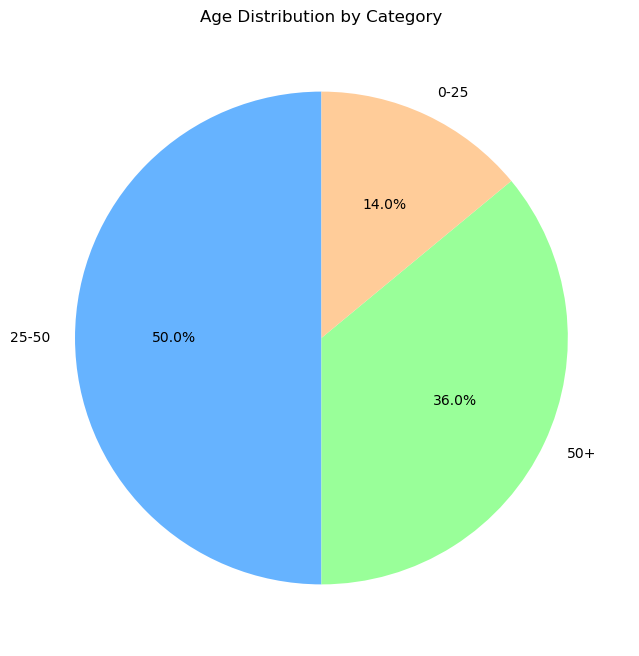

In [27]:
# 1. Create a pie chart of users' age distribution. 

### BEGIN SOLUTION
# Define age bins and labels
bins = [0, 25, 50, float('inf')]
labels = ['0-25', '25-50', '50+']

# Create a new column for age categories
data['AgeCategory'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Count the number of records in each category
age_category_counts = data['AgeCategory'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    age_category_counts,
    labels=age_category_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#99ff99', '#ffcc99']
)
plt.title('Age Distribution by Category')
plt.show()
### END SOLUTION

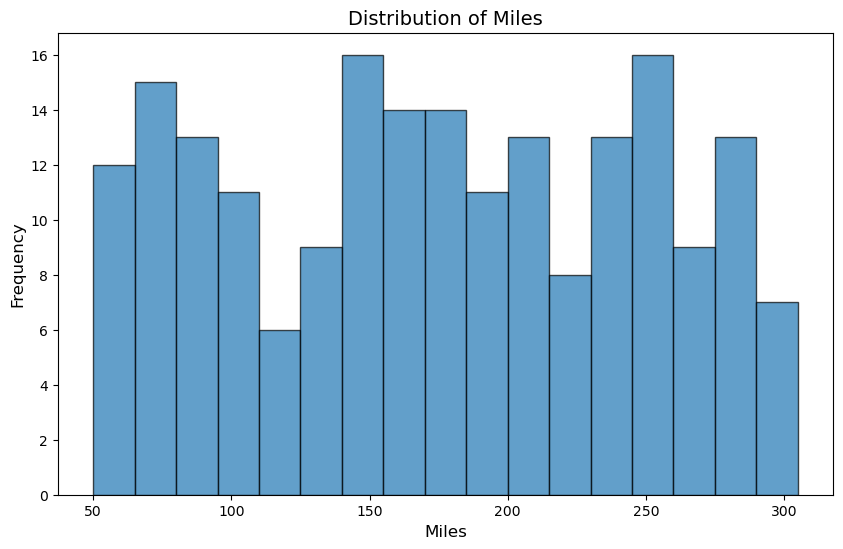

In [32]:
# 2. Create the distribution of miles.

### BEGIN SOLUTION
# Plot the frequency histogram of miles
plt.figure(figsize=(10, 6))

# Definition interval boundary
bins = [50, 65, 80, 95, 110, 125, 140, 155, 170, 185,  200, 215, 230, 245, 260, 275, 290, 305]

# Plot the histogram and set bins to the specified interval
plt.hist(data["Miles"], bins=bins, edgecolor="black", alpha=0.7)

# Set the title and label
plt.title("Distribution of Miles", fontsize=14)
plt.xlabel("Miles", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.show()
### END SOLUTION

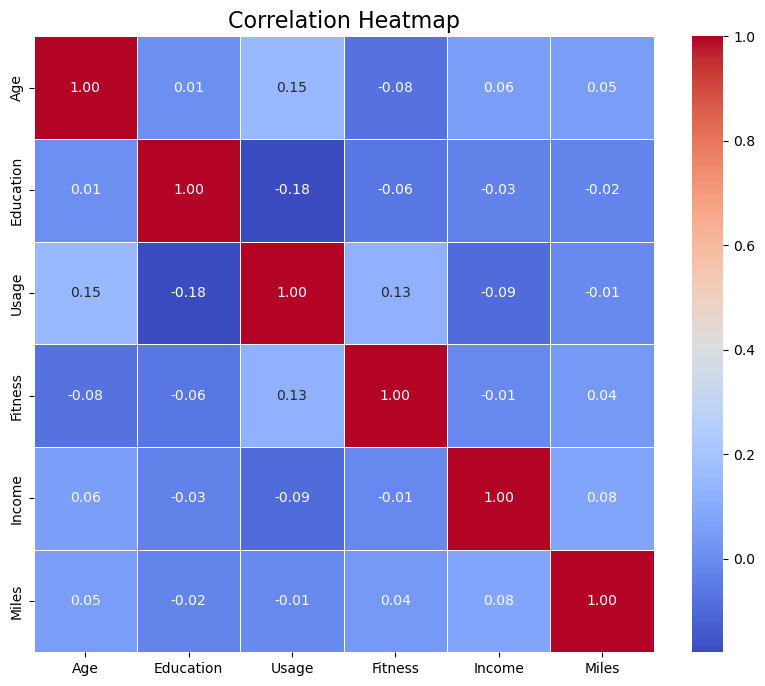

In [34]:
# 3. Draw heat map for all variables.

### BEGIN SOLUTION
# Select numeric features
numeric_columns = data.select_dtypes(include=["float64", "int64"]).columns

# Calculate the covariance matrix
correlation_matrix = data[numeric_columns].corr()

# Draw a covariance heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set the title 
plt.title("Correlation Heatmap", fontsize=16)

plt.show()
### END SOLUTION